Goal of this file is to compile all functions I need for interpretation of data throughout my Graduate degree. 

In [2]:
#Importing libraries
import matplotlib as mpl

%config InlineBackend.figure_formats = ['svg']

mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'mathtext.fontset': 'cm'})
mpl.rcParams.update({'axes.labelsize': 22})
mpl.rcParams.update({'axes.titlesize': 16})
mpl.rcParams.update({'axes.linewidth': 0.5})
mpl.rcParams.update({'xtick.labelsize': 10})
mpl.rcParams.update({'ytick.labelsize': 10})

import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np #Needed for a bunch of mathematical operations.


In [3]:
# Importing a data set from a frequency sweep for the storage and loss moduli. We get omega, G' and G''.

omega = np.array([])
lossModulus = np.array([])
storModulus = np.array([])

## Find some way to imput this data from an excel sheet and redefine them all.
## This could be rewritten into a function.




In [7]:

N = input('Input the number of modes for the fluid') ## Asks user how many modes they want for the calculation.



KeyboardInterrupt: Interrupted by user

In [4]:
def GJ_linear(N,omega): ##What the hell does this function do?
    ## Found in literature ............. (give reference)
    
    #Takes the number of nodes and the data set of omega
    lmda = np.linspace(np.log(1/omega[end]),np.log(1/data[0]),N) #Not sure what this is, but its required to calculate this z value
    
    
    
    
    return z

## K-BKZ-Papanastasiou Model (Pap-Zap Model)

<p style="text-align:center;">
<img src="PapZap.JPG" width=600>
</p>



In [5]:
import xlrd #Documentation on how to use xlrd @ https://openpyxl.readthedocs.io/en/stable/
import numpy as np



#Extracting Data Experimental Data Excel File
workbook = xlrd.open_workbook('Practice_Data.xlsx')

#Setting up Model Parameters sheet
sheet_MP = workbook.sheet_by_name('MODEL PARAMETERS')

## Creating cell value range of the Maxwell Model Mode results
cell_range = sheet_MP.cell_value(2,3)
MaxModelModes = np.zeros((8,2))

for i in range(0,2):
    for j in range(0,8):
        
        JJ = sheet_MP.cell_value(j+2,i+4)
        JJ = float(JJ)
        MaxModelModes[j,i] = JJ
## MaxModelModes has lambdai and Gi in the first and second columns respectively. Lambda [=] sec, Gi [=] Pa
LambdA = MaxModelModes[:,0] # Array of the lambda values
GiRelax = MaxModelModes[:,1] # Array of the relaxtion modulus values
N = np.size(LambdA) # Number of modes of the maxwell model. This will be used below for integral calculation in the BKBZ model.

## Bring in other experimentally determined values
alpha = 2.5
beta = 25 #
theta = -0.15 # this is the ratio of the normal stress differences, this would have been found while doing another experiment.

#The KBKZ is a big numerical integration to get the shear stress values basically. So we need to integrate from -infinity to t while summing over all the modes on this inside. 

print(LambdA)
print(GiRelax)


[1.55845720e-06 4.25559234e-05 5.52955844e-04 5.82683685e-03
 5.57252859e-02 4.50360355e-01 3.64496726e+00 5.62537847e+01]
[7.44306209e+05 1.81334450e+05 1.24810328e+05 7.97724935e+04
 4.20035239e+04 1.52843839e+04 1.97676151e+03 9.57913877e+01]


In [6]:
# Defining the Cauchy and Finger Tensors here.

def Cauchy(G1, G2, strainType):
    #Defining the Cauchy strain tensor with strain at t1 =  gamma 1 and strain at t2 = gamma 2
    C = np.zeros((3,3))
    gamma1 = G1
    gamma2 = G2
    dif = gamma2 - gamma1
    if dif >300:
        dif = 300 #Doing this to stop the overflow error
    if strainType == "Shear":
        C[0,0] = C[2,2] = 1
        C[0,1] = C[1,0] = dif
        C[1,1] = 1 + (dif)**2 
    elif strainType == 'Extension':
        C[0,0] = np.exp(-2 * (dif))
        C[1,1] = C[2,2] = np.exp((dif))
    
    else :
        print('Remember to give a strain type')
    
    return C


def Finger(G1, G2, strainType):
    #Defining the Finger strain tensor with strain at t1 =  gamma 1 and strain at t2 = gamma 2
    B = np.zeros((3,3))
    gamma1 = G1
    gamma2 = G2
    dif = gamma1 - gamma2
    if dif >300:
        dif = 300 #Doing this to stop the overflow error
    if strainType == "Shear":
        B[1,1] = B[2,2] = 1
        B[0,1] = dif 
        B[1,0] = dif
        B[0,0] = 1 + (dif)**2 
    elif strainType == 'Extension':
        B[0,0] = np.exp(2 * (dif))
        B[1,1] = B[2,2] = np.exp(-(dif))
    
    else :
        print('Remember to give a strain type')
    
    return B

print(Finger(500,0.01,'Extension'))

[[3.77302030e+260 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 5.14820022e-131 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 5.14820022e-131]]


In [7]:
# Getting the invariants of the strain tensors

def Invariants3by3(Tensor):
    # Takes any 3x3 matrix and calculates the invrariants of the matrix.
    # I will simply add the values as described in textbook. Rather than doing tedious calculations
    Inv1 = Tensor[0,0] + Tensor[1,1] + Tensor[2,2]
    Inv2 = Tensor[0,0]*Tensor[2,2] + Tensor[1,1]*Tensor[2,2] + Tensor[0,0]*Tensor[2,2] - Tensor[0,1]*Tensor[1,0] - Tensor[1,2]*Tensor[2,1] - Tensor[0,2]*Tensor[2,0]
    Inv3 = np.linalg.det(Tensor)
    return (Inv1,Inv2,Inv3)




In [8]:
def gammaSteadyShear(gamma0,t): return(gamma0*t)



def SimpleShearBKBZ(s):
    F = alpha*gamma0*(s*ModeSum2(s) / (alpha + (gamma0*s)**2))
    return F

def ModeSum2(s):
    ModSum = 0
    for i in range(0,N):
        ModSum += (GiRelax[i]/LambdA[i]) * np.exp(-(s) / LambdA[i]) # Becareful of the definition of tend here!
    return ModSum

import numericalintegration as numi
gamma0 = 0.01
II = numi.integrate(SimpleShearBKBZ,0,0.0811,102,'trapz')/gamma0
print(II)

1622.8918462500562


In [9]:


def RelaxationMod(t,tend):
    ModSum = 0
    for i in range(0,N):
        ModSum += (GiRelax[i]/LambdA[i]) * np.exp(-(tend-t) / LambdA[i]) # Becareful of the definition of tend here!
    return ModSum

def MemoryMod(t,tend):
    ModSum = 0
    for i in range(0,N):
        ModSum += (GiRelax[i]) * np.exp(-(tend-t) / LambdA[i]) # Becareful of the definition of tend here!
    return ModSum

    


def DampingFunction(t,tend,StrainType):
    #Bring in the finger tensor
    StrainTensor = Finger(gammaSteadyShear(gamma0,tend),gammaSteadyShear(gamma0,t),StrainType)
    
    #print(StrainTensor)
    Inv1,Inv2,Inv3 = Invariants3by3(StrainTensor)
    I = beta*Inv1 + (1-beta)*Inv2
    damping = alpha/(I + (alpha-3))
    return (damping)
    #print(damping)
    
def frontBKBZ(tend,StrainType):
    ##Calculate the strain tensors Finger and Cauchy
    B = Finger(gammaSteadyShear(gamma0,tend),gammaSteadyShear(gamma0,0),StrainType)
    C = Cauchy(gammaSteadyShear(gamma0,tend),gammaSteadyShear(gamma0,0),StrainType)
    
    if StrainType == 'Extension': #row in the stress tensor. Can be from 0 to 2
        row = 0
        col = 0
    elif StrainType == 'Shear':
        row=1
        col =0
    
    if StrainType == 'Extension':
        Bij = B[row,col] - B[row+1,col+1]
        Cij = C[row,col] - C[row+1,col+1]
    elif StrainType == 'Shear':
        Bij = B[row,col]
        Cij = C[row,col]
    
    F1 = DampingFunction(0,tend,StrainType)
    F2 = RelaxationMod(0,tend)
    F3 = Bij 
    return (F1*F2*F3)
    
    
def fBKBZ(t,tend,row,col,StrainType): #Direct relation to Eq. 5-61
    # p1 is the row in the stress tensor wanted to calculate
    # p2 is the column in the stress tensor wanted to calculate
    
    ##Calculate the strain tensors Finger and Cauchy
    B = Finger(gammaSteadyShear(gamma0,tend),gammaSteadyShear(gamma0,t),StrainType)
    C = Cauchy(gammaSteadyShear(gamma0,tend),gammaSteadyShear(gamma0,t),StrainType)
    
    if StrainType == 'Extension':
        Bij = B[row,col] - B[row+1,col+1]
        Cij = C[row,col] - C[row+1,col+1]
    elif StrainType == 'Shear':
        Bij = B[row,col]
        Cij = C[row,col]
    
    
    F1 = 1 / (1-theta) #/(1-theta) #Theta front factor.
    F2 = RelaxationMod(t,tend) #Sum of moduli
    F3 = DampingFunction(t,tend,StrainType) #Damping Function
    F4 = Bij  + theta*Cij #Function of the cauchy and finger strain tensors.
    return (F1*F2*F3*F4)
   


In [10]:
#This section involves the integration of EQ. (5.61)


tend = 0.01 #End time
tstart = 0 #Start time
tol = 1e-10 #Tolerance
maxit = 20 #Maximum number of iterations allowed by code.

## Stress info
StrainType = 'Shear' #Give the type of strain
row = 1 #row in the stress tensor. Can be from 0 to 2
col = 0 #column in the stress tensor. Can be from 0 to 2
gamma0 = 1 #Set the value of gamma0
# We will implement the rhomberg method for numerical approximation to get the best order of error we can.

# The Romberg matrix
I = np.zeros((maxit+1,maxit+1))




# Initialization
n = 1
t = np.linspace(tstart,tend,n+1)
dt = (tend - tstart) / n
II=0
for i in range(0,n):
    tmid = (t[i+1]+t[i]) / 2
    II+= fBKBZ(tmid,tend,row,col,StrainType) *dt
I[0,0] = II
iter = 0
    
# Loop until convergence or maxit is attained
while ( iter < maxit ):
    iter += 1
   
    # Divide h by 2 at each iteration and get new time interval
    n = 2**iter
    t = np.linspace(tstart,tend,n+1)    
    dt = (tend - tstart) / n
  
    # Compute an approximation with trapezoidal rule with h = ( b - a ) / 2^iter
    II = 0
    for i in range(0,n):
        tmid = (t[i+1]+t[i]) / 2
        II += fBKBZ(tmid,tend,row,col,StrainType) *dt
    I[iter,0] = II
   
    # Compute the improved estimates at each level
    for k in range(1,iter+1):
        j = iter - k;
        I[j,k] = ( 4**k * I[j+1,k-1] - I[j,k-1] ) / ( 4**k - 1 )
   
        # Compute relative error and check convergence
    ea = np.abs( ( I[0,iter] - I[1,iter-1] ) / I[0,iter] )
    if ea < tol: break
    
    integral = I[0,iter]
    niter = iter
    





#print(integral/gamma0)

In [11]:
#Reusing the code above to step through the 
#integration and make a shear stress growth vs time plot

def I_Bkbz(tn,gamma0,StrainType):
    
    tend = tn  #End time
    #print('The end time is',tend)
    tstart = 0 #Start time
    tol = 1e-6 #Tolerance
    maxit = 10 #Maximum number of iterations allowed by code.

    ## Stress info
    #StrainType = 'Shear' #Give the type of strain
    if StrainType == 'Extension': #row in the stress tensor. Can be from 0 to 2
        row = 0
        col = 0
    elif StrainType == 'Shear':
        row=1
        col =0
    
    #gamma0 = 0.5 #Set the value of gamma0
    # We will implement the rhomberg method for numerical approximation to get the best order of error we can.

    # The Romberg matrix
    I = np.zeros((maxit+1,maxit+1))




    # Initialization
    n = 1
    t = np.linspace(tstart,tend,n+1)
    dt = (tend - tstart) / n
    II=0
    for i in range(0,n):
        II+= (fBKBZ(t[i],tend,row,col,StrainType) + fBKBZ(t[i+1],tend,row,col,StrainType)) *dt/2
    I[0,0] = II
    iter = 0

    # Loop until convergence or maxit is attained
    while ( iter < maxit ):
        iter += 1

        # Divide h by 2 at each iteration and get new time interval
        n = 2**iter
        #print(n)
        t = np.linspace(tstart,tend,n+1)    
        dt = (tend - tstart) / n
        # Compute an approximation with trapezoidal rule with h = ( b - a ) / 2^iter
        II = 0
        for i in range(0,n):
             II+= (fBKBZ(t[i],tend,row,col,StrainType) + fBKBZ(t[i+1],tend,row,col,StrainType)) *dt/2
        I[iter,0] = II
        # Compute the improved estimates at each level
        for k in range(1,iter+1):
            j = iter - k;
            I[j,k] = ( 4**k * I[j+1,k-1] - I[j,k-1] ) / ( 4**k - 1 )

            # Compute relative error and check convergence
        ea = np.abs( ( I[0,iter] - I[1,iter-1] ) / I[0,iter] )
        if ea < tol: break

        integral = I[0,iter]
        
        niter = iter
    #print('The end integral is ', integral)
    return(integral)

#Test2 = DampingFunction(0.01,100,StrainType)
gamma0 = 0.1
StrainType = 'Extension'
Init = I_Bkbz(998,gamma0,StrainType)/gamma0
print(Init)

11318.053742639044


<ipython-input-6-c5dddc974f45>:16: RuntimeWarning: overflow encountered in exp
  C[0,0] = np.exp(-2 * (dif))
<ipython-input-11-6ed84a1890c0>:57: RuntimeWarning: invalid value encountered in double_scalars
  I[j,k] = ( 4**k * I[j+1,k-1] - I[j,k-1] ) / ( 4**k - 1 )


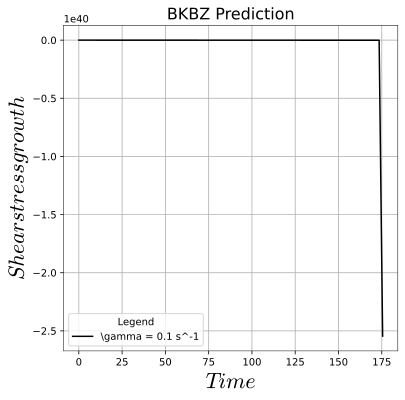

In [12]:
alpha = 2.5
beta = 25
theta = -0.15
StrainType = 'Extension'


tt = np.logspace(-2,3,1000)
gamma0 = 2

Int = np.zeros(len(tt))
for i in range(0,len(tt)):
    Int[i] =  ((I_Bkbz(tt[i],gamma0,StrainType)) / gamma0)


    
#gamma0 = 0.5
#Int2 = np.zeros(len(tt))
#for i in range(0,len(tt)):
    #   Int2[i] = DampingFunction(tt[i],0.1,StrainType)

#gamma0 = 1
#Int3 = np.zeros(len(tt))
#for i in range(0,len(tt)):
#    Int3[i] =  (3000 + (I_Bkbz(tt[i],gamma0,StrainType)) / gamma0)
    
#gamma0 = 2
#Int4 = np.zeros(len(tt))
#for i in range(0,len(tt)):
#    Int4[i] = (3000 + (I_Bkbz(tt[i],gamma0,StrainType)) / gamma0)

#gamma0 = 1
#Int5 = np.zeros(len(tt))
#for i in range(0,len(tt)):
 #   Int5[i] = I_Bkbz(tt[i],gamma0,StrainType) / gamma0

    
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot( tt, Int,  color='black', label='\gamma = 0.1 s^-1' )
#ax.plot( tt, Int2, color='red', label='\gamma = 0.5 s^-1' )
#ax.plot( tt, Int3, color='blue', label='\gamma = 1 s^-1' )
#ax.plot( tt, Int4, color='green', label='\gamma = 2 s^-1' )
#ax.plot( tt, Int5, color='orange', label='\gamma = 1 s^-1' )
ax.set_xlabel('$Time$')
ax.set_ylabel('$Shear stress growth$')
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_title('BKBZ Prediction')
ax.legend(loc='best',title='Legend')
ax.grid() 


In [16]:
#Int.tofile('tt.csv',sep=' ',format='%10.5f')

In [161]:
##Restarting from Eq. 5 of doc

def RelaxationMod(ttt,T):
    ModSum = 0
    for i in range(0,N):
        ModSum += (GiRelax[i]/LambdA[i]) * np.exp(-(T-ttt) / LambdA[i]) # Becareful of the definition of tend here!
    return ModSum

def Damping2(ttt,T,StrainType):
    if StrainType == 'Extension': #row in the stress tensor. Can be from 0 to 2
        IB = np.exp(2*gamma0*(T-ttt)) + 2*np.exp(-gamma0*(T-ttt))
        IIB = 2*np.exp(gamma0*(T-ttt)) + np.exp(-2*gamma0*(T-ttt))
    elif StrainType == 'Shear':
        IB =IIB = 3 + ((gamma0)**2)*(T-ttt)**2
    damping = alpha / (alpha - 3 + beta*IB +(1-beta)*IIB)
    return damping
    
def Bij2(ttt,T,StrainType):
    if StrainType == 'Extension': #row in the stress tensor. Can be from 0 to 2
        Bij = np.exp(2*gamma0*(T-ttt)) - np.exp(-gamma0*(T-ttt))
    elif StrainType == 'Shear':
        Bij = gamma0*(T-ttt)
    return Bij

def PapaBKBZ(t):
    F1 = RelaxationMod(t,T)
    F2 = Damping2(t,T,StrainType)
    F3 = Bij(t,T,StrainType)
    return (F1*F2*F3)

StrainType = 'Shear'


3013.6466271117506


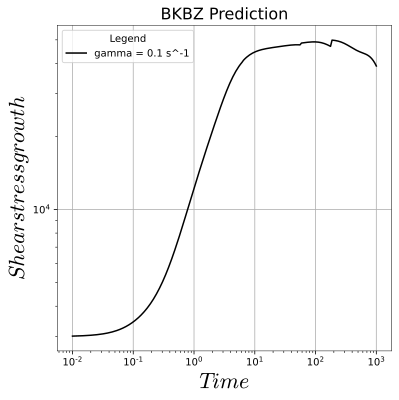

In [149]:
alpha = 2.5
beta = 25
theta = -0.15
StrainType = 'Extension'

tt = np.logspace(-2,3,200)
gamma0 = 0.1

Int2 = np.zeros(len(tt))
for k in range(0,len(tt)):
    T = tt[k]
    Int2[k] =  numi.integrate(PapaBKBZ,0,T,102,'simp_3/8')/gamma0

    
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot( tt, Int,  color='black', label='gamma = 0.1 s^-1' )
ax.set_xlabel('$Time$')
ax.set_ylabel('$Shear stress growth$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('BKBZ Prediction')
ax.legend(loc='best',title='Legend')
ax.grid() 
print(Int[1])